In [2]:
!python --version

Python 3.7.13


## INTRODUCCIÓN

**1.1.** Presentación del equipo de trabajo

La consultora “CoderData” está conformada por: 
Pedro Di Liscia: Hidrogeólogo de la Universidad Nacional de La Pampa. 
Oscar Nieto: Ingeniero de datos en Datalytics.
Alfredo Parente: Analista de Datos Calidad Interna en Claro.
Sofía Vila: Analista financiero en Finca Flichman.

**1.2.** Temática

Una empresa internacional de distribución de vinos con origen italiano llamada “VinTernazionali” presenta una disminución lenta pero sostenida de sus ventas desde hace 10 años.
Luego de realizar una auditoría interna, notaron que la causa de esta disminución es que el sistema de clasificación de vinos que daban a sus clientes no era adecuado, ya que solamente se basaba en la relación calidad-precio. Ese sistema había sido eficiente en el pasado, pero actualmente con la aplicación de nuevas tecnologías, cambios metodológicos en la industria y aparición de nuevas bodegas, la mayoría de los vinos no puede ser clasificado solamente utilizando estas dos variables. 
Es por esa razón que actualmente la empresa está intentando aplicar un nuevo sistema de clasificación de sus vinos para retomar el vínculo con sus clientes.
La empresa nos provee un dataset (https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv) el cual contiene todas las reviews realizadas a los vinos que ellos comercializan. 
La consultora “CoderData” trabajará con el dataset provisto e intentará generar ese nuevo sistema de clasificación solicitado por la empresa. 


**1.3.** Problemática

El cliente sostiene que la relación calidad precio ya no es un parámetro viable para la clasificación rápida de los vinos, y en consecuencia de eso, sus ventas disminuyen año a año.

**1.4.** Objetivo

Crear un nuevo sistema de clasificación rápida de vinos que pueda ser aplicado por el consumidor final al momento de la compra del producto. Es por ello que este sistema debe utilizar información visible en la etiqueta (bodega, año de cosecha, precio, etc) y no considerar parámetros físico-químicos (acidez, pH, etc) que para el consumidor final promedio, no tienen ningún significado. Adicionalmente, este sistema debe ser capaz de clasificar nuevos vinos que ingresen al catálogo de la empresa.  

**1.5.** Hipótesis

Las hipótesis que se plantean para el trabajo son las siguientes:
La relación calidad-precio es un buen sistema de evaluación rápida de los vinos.
Los vinos de alta calidad son los más caros.
El precio no es la única variable que define si un vino es bueno, regular o malo.

**1.6.** Alcance

El proyecto tiene un alcance internacional, destinado a la empresa distribuidora “VinTernazionali”.   


## Base de Datos:




* **Country:** país de origen.
* **Description:** breve descripción del vino.
* **Designation**: viñedo de donde proviene el vino.
* **Points**: puntaje dado por el sommelier al vino. (Fueron tomados en consideracion para este analisis los puntajes entre 80 y 100).
* **Price**: precio del vino.
* **Province**: provincia del vino.
* **Region_1**: provincia o estado de donde proviene el vino.
* **Region_2**: región más específica de donde proviene el vino.
* **Taster_name**: nombre del sommelier.
* **Taster_twitter_handle**: cuenta de twitter del sommelier.
* **Title**: Titulo de la reseña del vino.
* **Variety**: Varietal del vino (Ej. Pinot Noir).
* **Winery**: Bodega que elabora el vino.
* **Year**: año de producción.
* **Continent**: Continente al que pertenece el país de origen del vino.
* **Gender**: género del sommelier que realizó el testing del vino.
* **Aprobó**: en base al puntaje que obtuvo el vino se divide en 1 (aprobó>92 puntos) y 2 (desaprobó<92 puntos).
* **Categoría de calidad**: En base al puntaje, se procedió a Clasificar el vino en 3 categorías: A (>=95 puntos), B (90-94,9 puntos), C (<89,9 puntos).


## Importamos las librerias a utilizar y fuente de datos

In [ ]:
!pip install geopandas
import numpy as np
import pandas as pd 
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Correr esta celda si se importan los datos desde el drive
df_wine = pd.read_excel('/content/drive/MyDrive/Proyecto Final Coder/4_Proyecto_Final_Coder_House/winemag-data-130k-v3-3°Entrega.xlsx')
df_map = gpd.read_file('/content/drive/MyDrive/Proyecto Final Coder/world.shp/World_Countries.shp')

#Data wrangling

In [ ]:
df_wine.head()

,indice,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,continent,gender,aprobo,categoria_calidad
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,39,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,Europe,M,2,C
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,Europe,M,2,C
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,North America,M,2,C
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,North America,M,2,C
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,North America,M,2,C


In [ ]:
df_wine.shape

(129971, 19)

In [ ]:
df_wine.columns

Index(['indice', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'year',
       'continent', 'gender', 'aprobo', 'categoria_calidad'],
      dtype='object')

In [ ]:
df_wine.dtypes

indice                    int64
country                  object
description              object
designation              object
points                    int64
price                     int64
province                 object
region_1                 object
region_2                 object
taster_name              object
taster_twitter_handle    object
title                    object
variety                  object
winery                   object
year                      int64
continent                object
gender                   object
aprobo                    int64
categoria_calidad        object
dtype: object

# EDA

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   indice                 129971 non-null  int64 
 1   country                129971 non-null  object
 2   description            129971 non-null  object
 3   designation            92505 non-null   object
 4   points                 129971 non-null  int64 
 5   price                  129971 non-null  int64 
 6   province               129905 non-null  object
 7   region_1               108722 non-null  object
 8   region_2               50510 non-null   object
 9   taster_name            129971 non-null  object
 10  taster_twitter_handle  121708 non-null  object
 11  title                  129968 non-null  object
 12  variety                129967 non-null  object
 13  winery                 129968 non-null  object
 14  year                   129971 non-null  int64 
 15  

In [ ]:
df_wine.count()

indice                   129971
country                  129971
description              129971
designation               92505
points                   129971
price                    129971
province                 129905
region_1                 108722
region_2                  50510
taster_name              129971
taster_twitter_handle    121708
title                    129968
variety                  129967
winery                   129968
year                     129971
continent                129971
gender                   129971
aprobo                   129971
categoria_calidad        129971
dtype: int64

In [ ]:
df_wine.describe().round(2)

,indice,points,price,year,aprobo
count,129971.00,129971.00,129971.00,129971.00,129971.0
mean,64985.00,88.45,33.29,2010.64,1.9
std,37519.54,3.04,24.28,4.03,0.3
min,0.00,80.00,4.00,1821.00,1.0
25%,32492.50,86.00,22.00,2009.00,2.0
50%,64985.00,88.00,31.00,2011.00,2.0
75%,97477.50,91.00,42.00,2013.00,2.0
max,129970.00,100.00,2500.00,2017.00,2.0


In [ ]:
df_wine.isna().sum()

indice                       0
country                      0
description                  0
designation              37466
points                       0
price                        0
province                    66
region_1                 21249
region_2                 79461
taster_name                  0
taster_twitter_handle     8263
title                        3
variety                      4
winery                       3
year                         0
continent                    0
gender                       0
aprobo                       0
categoria_calidad            0
dtype: int64

In [ ]:
correlation = df_wine.corr(method="pearson")
correlation.head()

,indice,points,price,year,aprobo
indice,1.000000,0.007194,0.035901,0.022877,-0.009827
points,0.007194,1.000000,0.201036,0.048479,-0.577684
price,0.035901,0.201036,1.000000,-0.031593,-0.176575
year,0.022877,0.048479,-0.031593,1.000000,0.016981
aprobo,-0.009827,-0.577684,-0.176575,0.016981,1.000000


### **Análisis Univariado**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


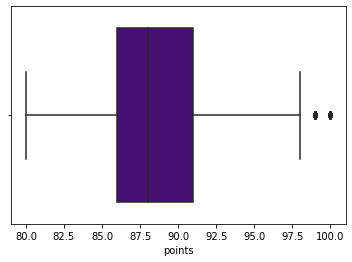

In [ ]:
from seaborn import boxplot
boxplot(df_wine.points, color = "indigo")
plt.show()
#en este boxplot observamos que el puntaje se concentra en un rango entre 86 y 91

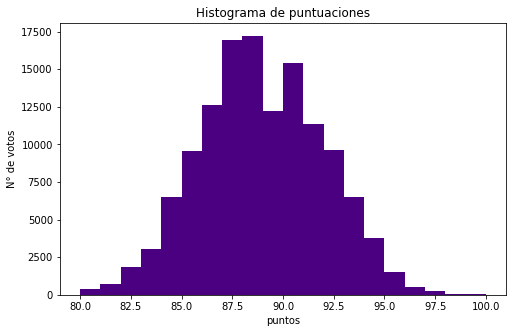

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_wine['points'], bins=20, color = "indigo")
ax.set_title('Histograma de puntuaciones')
ax.set_xlabel('puntos')
ax.set_ylabel('N° de votos')
plt.show()
#este histograma nos confirma lo mostrado en el boxplot


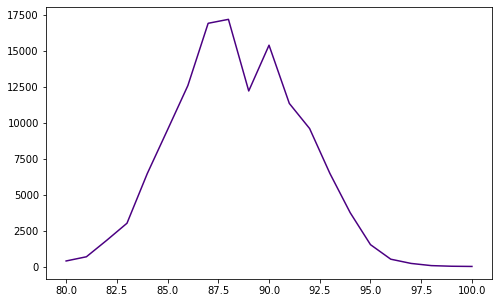

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
df_wine['points'].value_counts().sort_index().plot.line(color = "indigo")
plt.show()
#otra forma de ver la distribución de los datos

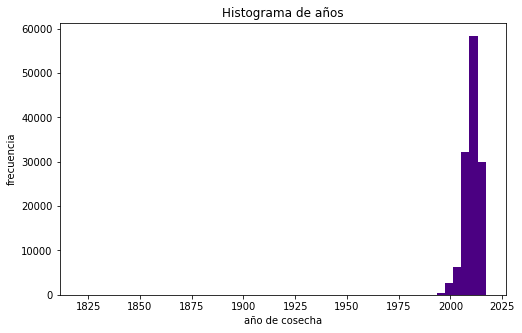

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_wine['year'], bins=50, color = "indigo")
ax.set_title('Histograma de años')
ax.set_xlabel('año de cosecha')
ax.set_ylabel('frecuencia')
plt.show()
#este histograma nos muestra que la gran mayoria de los años de cosecha
#es posterior al año 2000

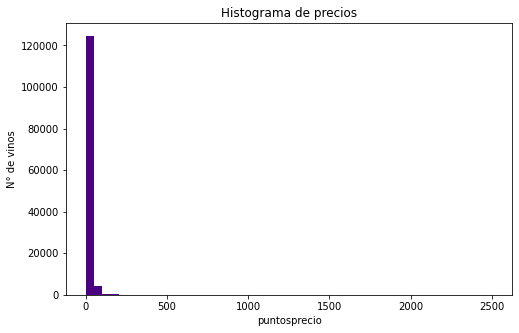

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_wine['price'], bins=50, color = "indigo")
ax.set_title('Histograma de precios')
ax.set_xlabel('puntosprecio')
ax.set_ylabel('N° de vinos')
plt.show()
#vemos que la gran mayoria de los precios tienen un valor bajo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


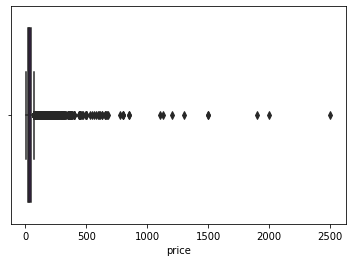

In [ ]:
from seaborn import boxplot
boxplot(df_wine.price, color = "indigo")
plt.show()
#en este boxplot observamos que el precio tiene una variabilidad muy grande
#el grueso de los precios son bajos, pero hay algunos pocos que superan los 500 dolares. 

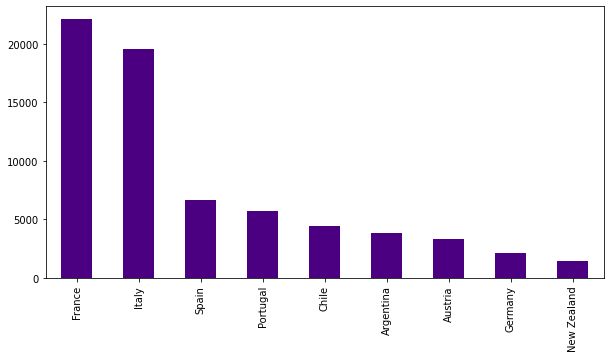

In [ ]:
df_wine_primeros_10_pais = df_wine[df_wine.country.isin (['United States','France','Italy','Spain','Portugal','Chile','Argentina','Austria','Germany','New Zealand'])]
fig, ax = plt.subplots(figsize=(10, 5))
df_wine_primeros_10_pais['country'].value_counts().plot.bar(color = "indigo")
plt.show()
# aqui observamos el país de origen de los vinos que tienen mas reviews

### **Análisis Bivariado**

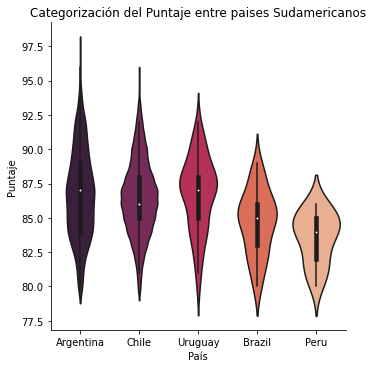

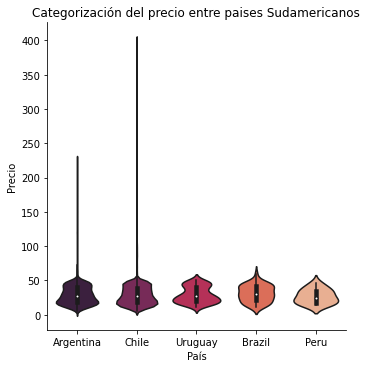

In [ ]:
#filtramos los paises de sudamerica
df_pais = df_wine[df_wine.country.isin (['Argentina','Chile','Peru','Brazil','Uruguay'])]
df_pais
#comparamos los puntajes con un grafico de violin
ax = sns.catplot(data=df_pais, kind='violin', x='country', y='points', split=True, palette='rocket')
ax.set(xlabel='País', ylabel='Puntaje', title='Categorización del Puntaje entre paises Sudamericanos')
plt.show()
#comparamos los precios con otro grafico de violin
#es destacable que los precios en Argentina, Chile y Uruguay tienen un comportamiento bimodal
ax = sns.catplot(data=df_pais, kind='violin', x='country', y='price', split=True, palette='rocket')
ax.set(xlabel='País', ylabel='Precio', title='Categorización del precio entre paises Sudamericanos')
plt.show()

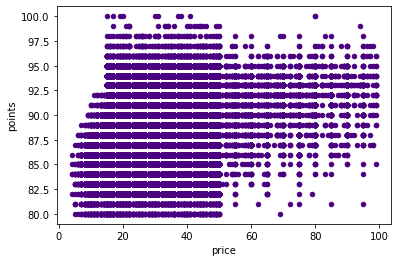

In [ ]:
df_wine[df_wine['price'] < 100].plot.scatter(x='price', y='points', color='indigo')
#hacemos scatter plot con las variables de puntos y precio (menor a 100 dólares)
#la elevada cantidad de puntos no nos permite distinguir ningun rasgo

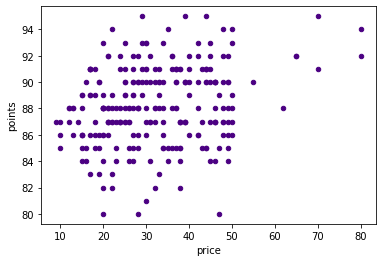

In [ ]:
df_wine[df_wine['price'] < 100].sample(250).plot.scatter(x='price', y='points', color='indigo')
#haciendo el mismo grafico pero con una muestra de 250 datos, se observa que en el extremo 
#inferior izquierdo hay mayor densidad de datos, tambien se ve una leve correlación directa

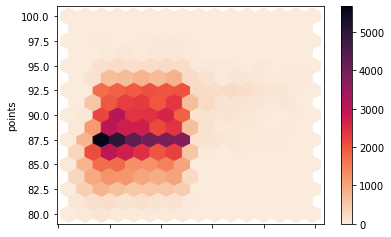

In [ ]:
df_wine[df_wine['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15, cmap='rocket_r')
plt.show()
#con este grafico el cual muestra la densidad de puntos, podemos concluir que
#la gran mayoria de los vinos tiene puntaje cercanos a 87.5 y un precio que ronda los 20 a 40 dolares. 

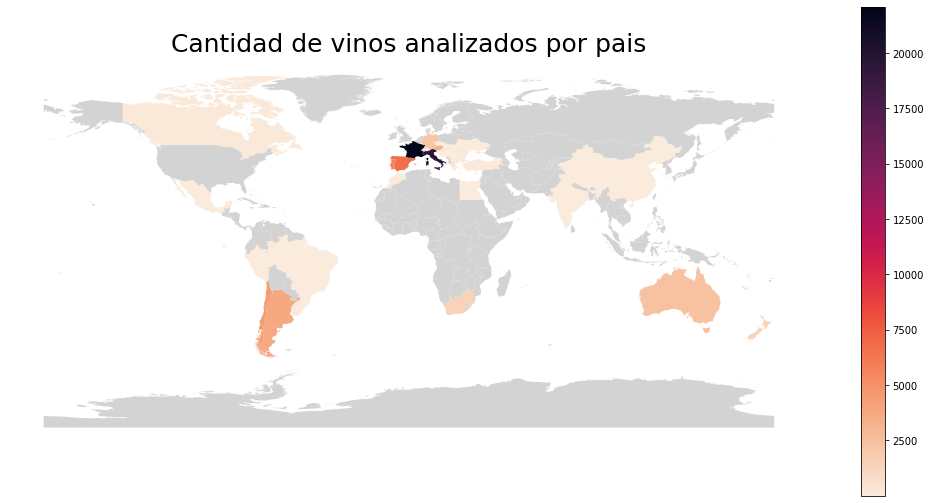

In [ ]:
frec= pd.DataFrame(df_wine['country'].value_counts())
df_map_wine = df_map.merge(frec, how='left', left_on='COUNTRY',right_index=True)
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111)
ax.set_title('Cantidad de vinos analizados por pais', size=25)
df_map_wine.plot(column='country',
           ax=ax,
           legend=True,
           cmap='rocket_r',
           missing_kwds={"color": "lightgrey"},);
ax.set_axis_off();
#generamos un mapa en donde vemos el origen de los vinos que tienen reviews

### **Análisis Multivariado**


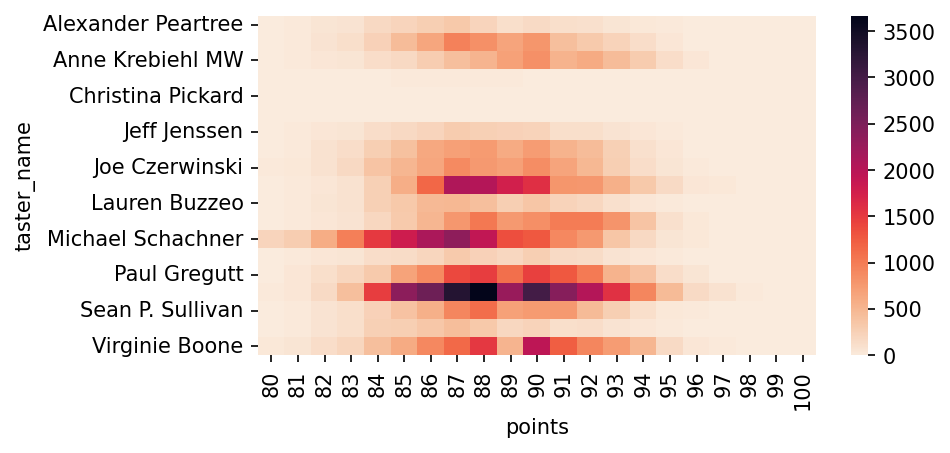

In [ ]:
plt.figure(figsize=(6,3), dpi=150)
result = pd.crosstab(df_wine.taster_name, df_wine.points)
sns.heatmap(result,cmap = 'rocket_r' )
#en este crosstab podemos observar los nombres de los catadores, el puntaje que otorgaron
#y que tan frecuentemente otorgan ese puntaje

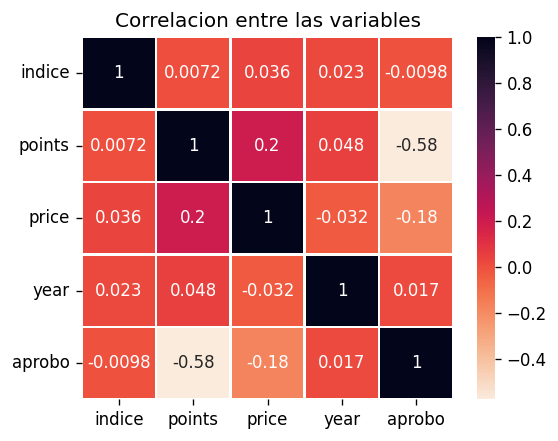

In [ ]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_wine.corr(),dtype = bool))
sns.heatmap(df_wine.corr(), annot=True, lw = 1, cmap = 'rocket_r')
plt.yticks(rotation = 0)
plt.title('Correlacion entre las variables')
plt.show()
#se observa que la correlación entre las variables es muy baja

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


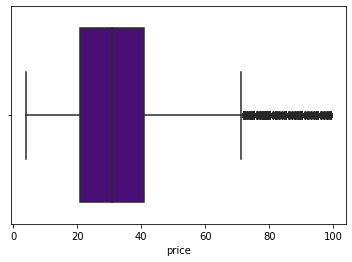

In [ ]:
df_wine_100usd = df_wine[df_wine['price'] < 100]
#aqui filtramos los autliers de precio, de esa manera, sin perder una cantidad de datos importante, podemos analizar mejor el dataset
from seaborn import boxplot
boxplot(df_wine_100usd.price, color = "indigo")
plt.show()

Basandonos en este boxplot, podemos afirmar que la gran mayoría de los vinos tiene un valor menor a los 100 dólares, incluso, la caja se encuentra entre 20 y 40 dólares. 

In [ ]:
df_wine_100usd_Arg = df_wine_100usd.loc[df_wine_100usd.country == 'Argentina', :]


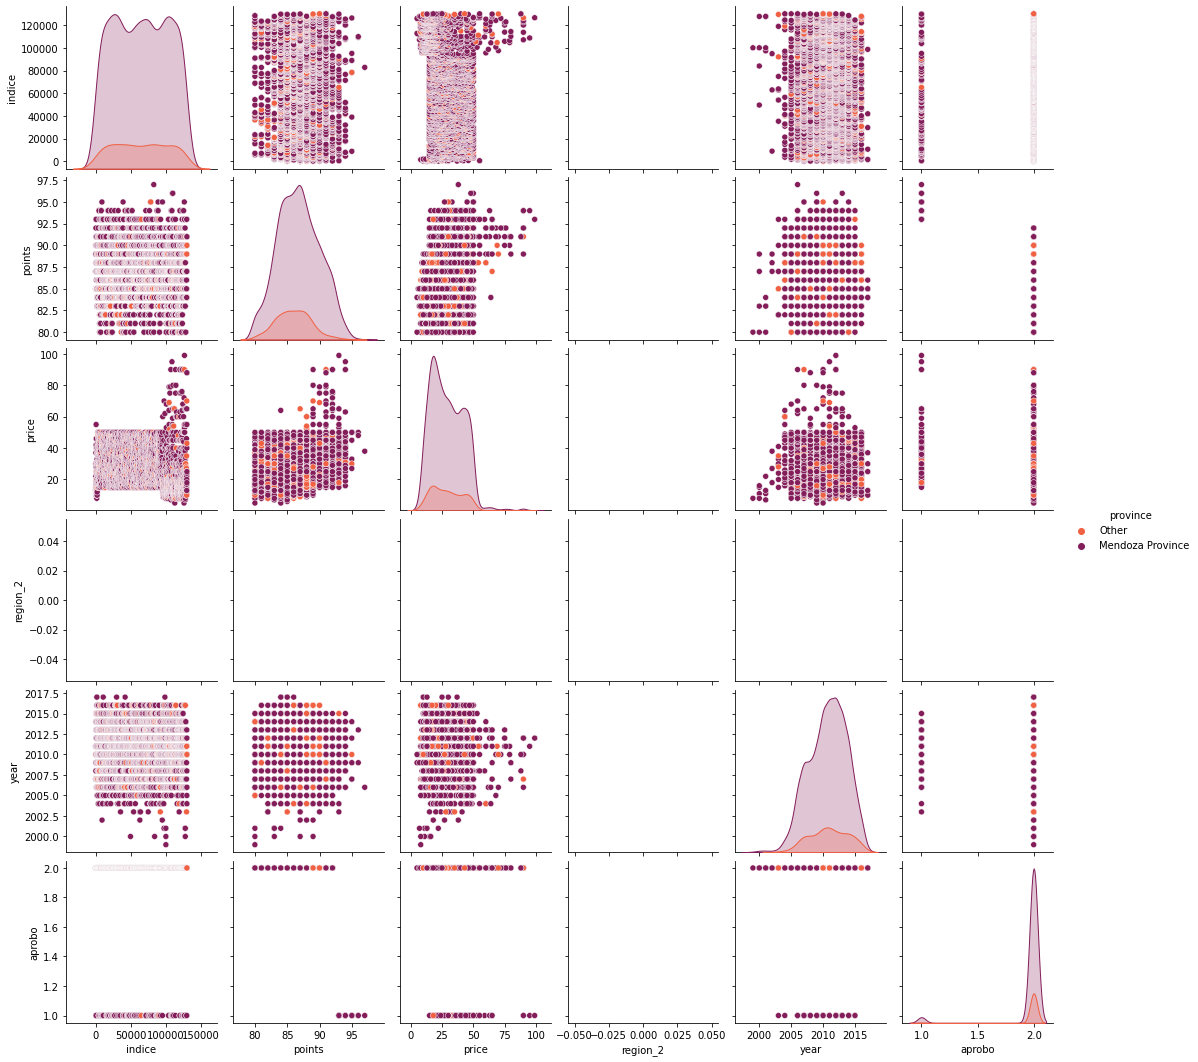

In [ ]:
sns.pairplot(df_wine_100usd_Arg, hue='province', palette= 'rocket_r')

In [ ]:
# transformamos todo en variables categóricas para poder entrenar de mejor manera el modelo
for n in df_wine_100usd.columns:
  if str(df_wine_100usd[n].dtype) == 'object' or str(df_wine_100usd[n].dtype) == 'category':
    df_wine_100usd[n] = df_wine_100usd[n].astype('category').cat.codes
df_wine_100usd.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,indice,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,continent,gender,aprobo,categoria_calidad
0,0,22,16239,36529,87,39,331,423,-1,9,4,78794,688,11588,2013,2,1,2,2
1,1,31,99092,2305,87,15,108,-1,-1,15,10,88539,449,12933,2011,2,1,2,2
2,2,40,74779,-1,87,14,268,1216,16,14,7,88952,435,12995,2013,3,1,2,2
3,3,40,59933,27750,87,13,218,548,-1,0,-1,99963,477,14365,2013,3,1,2,2
4,4,40,55174,36190,87,65,268,1216,16,14,7,101876,439,14596,2012,3,1,2,2


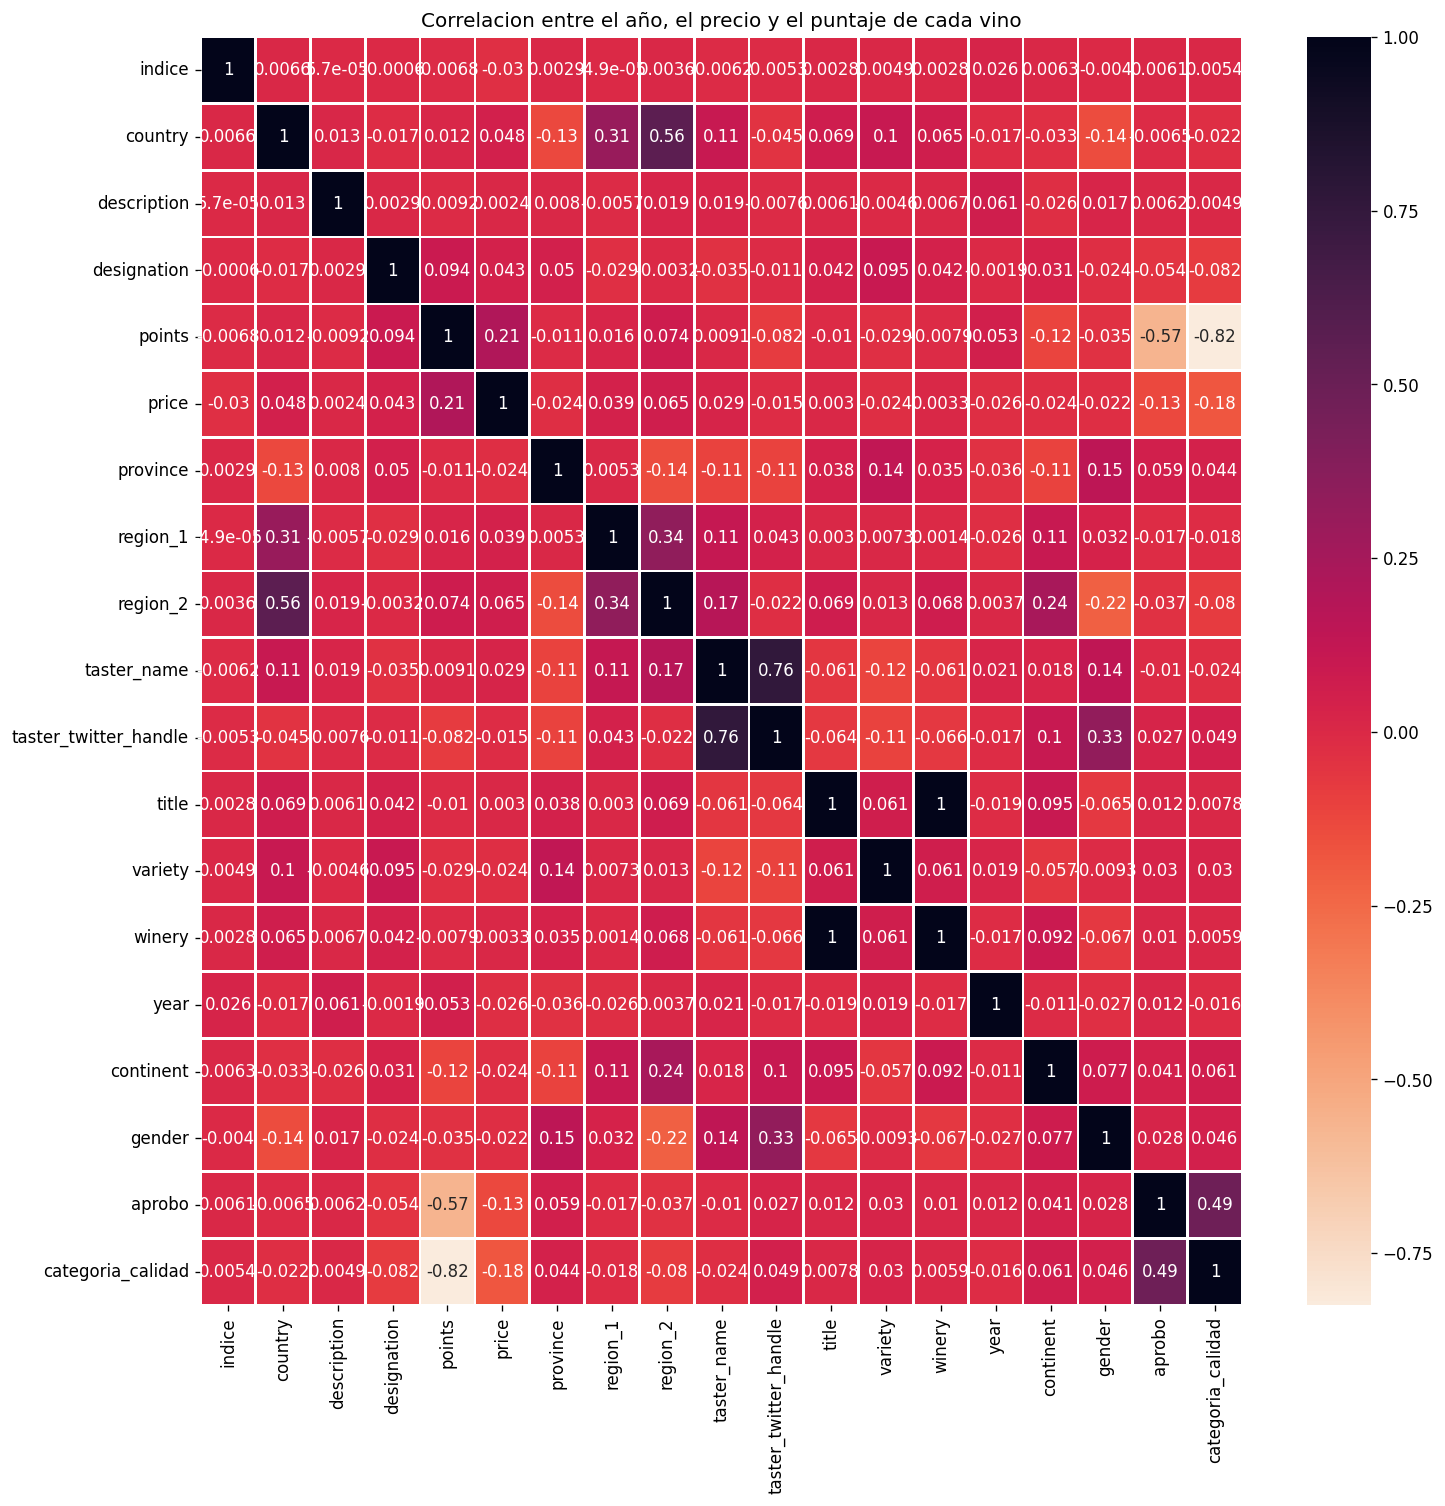

In [ ]:
#luego de modificar el dataset volvemos a evaluar la correlación entre las variables
#Correlaciones
plt.figure(dpi = 120,figsize= (14,14))
mask = np.triu(np.ones_like(df_wine_100usd.corr(),dtype = bool))
sns.heatmap(df_wine_100usd.corr(), annot=True, lw = 1, cmap = 'rocket_r')
plt.yticks(rotation = 0)
plt.title('Correlacion entre el año, el precio y el puntaje de cada vino')
plt.show()
#se observa que la correlación entre las variables es muy baja

# Algoritmos de clasificación

En base a los análisis de variables realizados previamente, 
quitamos del dataset las columnas irrelevantes que no aportan información al modelo.
Las columnas que eliminamos son: indice, region_1, region_2, taster_name, taster_twitter_handle, description, title, gender

In [ ]:
df_wine_100usd.drop(['indice', 'region_1', 'aprobo', 'region_2', 'taster_name', 'taster_twitter_handle', 'description', 'title', 'gender', 'designation'], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_wine_100usd.head()

,country,points,price,province,variety,winery,year,continent,categoria_calidad
0,22,87,39,331,688,11588,2013,2,2
1,31,87,15,108,449,12933,2011,2,2
2,40,87,14,268,435,12995,2013,3,2
3,40,87,13,218,477,14365,2013,3,2
4,40,87,65,268,439,14596,2012,3,2


## Decision tree

In [ ]:
#Obtenemos las columnas que usaremos para armar el modelo
df_DeTree = df_wine_100usd 
df_DeTree.head()

,country,points,price,province,variety,winery,year,continent,categoria_calidad
0,22,87,39,331,688,11588,2013,2,2
1,31,87,15,108,449,12933,2011,2,2
2,40,87,14,268,435,12995,2013,3,2
3,40,87,13,218,477,14365,2013,3,2
4,40,87,65,268,439,14596,2012,3,2


In [ ]:
#categorias de la variable target 
print(df_DeTree['categoria_calidad'].unique())

[2 1 0]


In [ ]:
#Definimos Xd e Yd, le ponemos la 'd' para referenciar que son de Decision Tree 
Xd = df_DeTree.drop(['categoria_calidad' , 'points'], axis=1) 
#Se elimina el valor a predecir "categoria_calidad" 
#tambien se elimina 'points' ya que esta muy relacionada a la varable 'categoría_de_calidad'
Yd = df_DeTree.categoria_calidad 
#Paso a definirlo como Target

In [ ]:
#Importo las librerias para diferenciar train y test
from sklearn.model_selection import train_test_split 
#Defino el porcentaje para cada uno Train: 70, Test:30
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.30, random_state=47) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
#Creamos el modelo
model_DeTree = DecisionTreeClassifier(max_depth=20, random_state = 47) 

In [ ]:
#Entrenamos el modelo
model_DeTree.fit(Xd_train,Yd_train)

DecisionTreeClassifier(max_depth=20, random_state=47)

In [ ]:
#Prediccion en Train
Yd_train_pred = model_DeTree.predict(Xd_train) 
#Prediccion en Test
Yd_test_pred = model_DeTree.predict(Xd_test) 

In [ ]:
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
train_accuracy = accuracy_score(Yd_train, Yd_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(Yd_test, Yd_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos en set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.82107
% de aciertos en set de evaluación: 0.65233


In [ ]:
#evaluamos la importancia de cada variable en el algoritmo
importancia_predictores_DeTree = pd.DataFrame(
                            {'predictor': df_DeTree.drop(columns = ["categoria_calidad", "points"]).columns,
                             'importancia': model_DeTree.feature_importances_}
                            )
print("Importancia de los predictores ")
print("en el modelo Decision Tree") 
print("-------------------------------------------")
importancia_predictores_DeTree.sort_values('importancia', ascending=False)

Importancia de los predictores 
en el modelo Decision Tree
-------------------------------------------


,predictor,importancia
4,winery,0.329235
1,price,0.229106
5,year,0.151084
3,variety,0.144734
2,province,0.090608
0,country,0.031767
6,continent,0.023467


Se observa que las variables mas relevantes que toma el algoritmo a la hora de predecir la categoria_de_calidad son: winery, price, year y variety

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Yd_test, Yd_test_pred))

              precision    recall  f1-score   support

           0       0.16      0.08      0.11       640
           1       0.53      0.47      0.50     13732
           2       0.72      0.77      0.74     24271

    accuracy                           0.65     38643
   macro avg       0.47      0.44      0.45     38643
weighted avg       0.64      0.65      0.65     38643



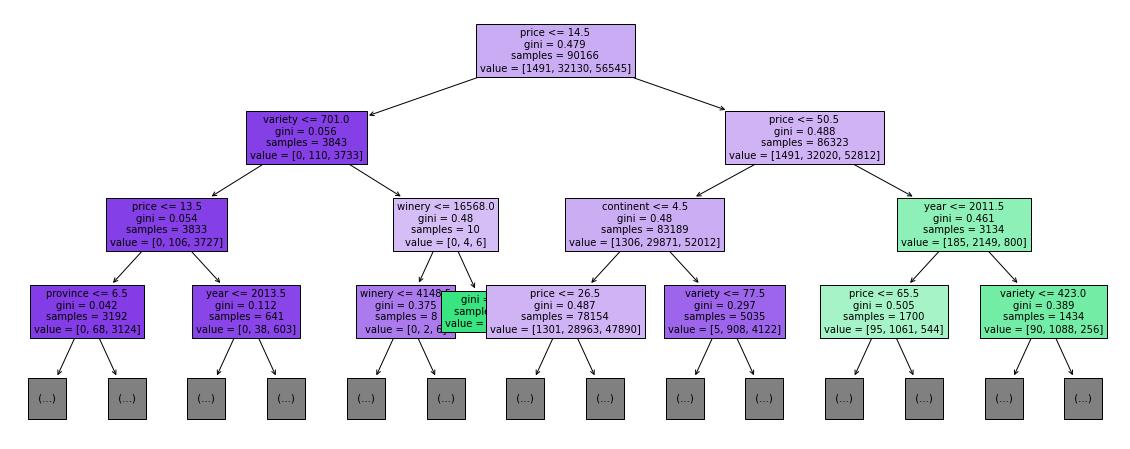

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8))
plot_tree(decision_tree=model_DeTree, feature_names=Xd.columns, filled=True, fontsize=10, max_depth=3);

In [ ]:
#Optimizacion de hiperparametros
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(1, 30),
'criterion' : ['gini' , 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True)
grid_search.fit(Xd_train, Yd_train)
print("Mejores parametros:") 
grid_search.best_params_

Mejores parametros:


{'criterion': 'entropy', 'max_depth': 13}

In [ ]:
#Importamos el modelo
from sklearn.tree import DecisionTreeClassifier 
#creamos el modelo optimizado
model_DeTree_opt = DecisionTreeClassifier(max_depth=13, criterion = 'entropy', random_state = 47) #Creamos el modelo
model_DeTree_opt.fit(Xd_train,Yd_train)
#Prediccion en Train
Yd_train_pred = model_DeTree_opt.predict(Xd_train) 
#Prediccion en Test
Yd_test_pred = model_DeTree_opt.predict(Xd_test) 
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
train_accuracy = accuracy_score(Yd_train, Yd_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(Yd_test, Yd_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos en set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.69893
% de aciertos en set de evaluación: 0.67515


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2400x2400 with 0 Axes>

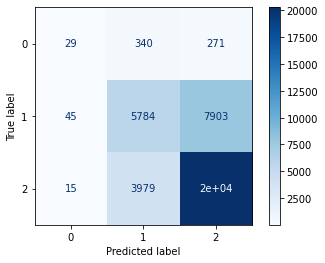

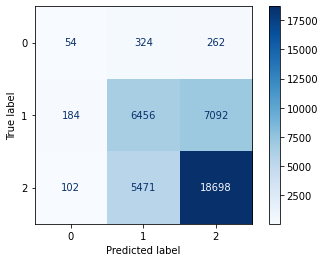

In [ ]:
#comparación de matrices de confusión
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#Ploteamos la Matriz
plt.figure(dpi = 120,figsize= (20,20))
#matriz del modelo optimizado
plot_confusion_matrix(model_DeTree_opt, Xd_test, Yd_test,cmap=plt.cm.Blues)
#matriz del modelo sin optimizar
plot_confusion_matrix(model_DeTree, Xd_test, Yd_test,cmap=plt.cm.Blues)
plt.show()

In [ ]:
#evaluamos el error del modelo
from sklearn.metrics import mean_squared_error
def evaluar_modelo(model_DeTree, Xd_train, Xd_test, Yd_train, Yd_test):
       
    Yd_train_pred = model_DeTree.predict(Xd_train)
    Yd_test_pred = model_DeTree.predict(Xd_test)
    Yd_train_pred = scaler_y.inverse_transform(Yd_train_pred)
    Yd_test_pred = scaler_y.inverse_transform(Yd_test_pred)
    Yd_train = scaler_y.inverse_transform(Yd_train)
    Yd_test = scaler_y.inverse_transform(Yd_test)
    Yd_train_pred = Yd_train_pred.reshape((len(Yd_train_pred),1))
    Yd_test_pred = Yd_test_pred.reshape((len(Yd_test_pred),1))


Raíz del error cuadrático medio en Train del algoritmo Decision Tree: 0.5678270181749746
Raíz del error cuadrático medio en Test del algoritmo Decision Tree: 0.589108330096586



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


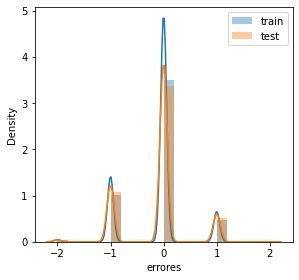

In [ ]:
# calculo del error
rmse_train_DeTree = np.sqrt(mean_squared_error(Yd_train, Yd_train_pred))
rmse_test_DeTree = np.sqrt(mean_squared_error(Yd_test, Yd_test_pred))

print(f'Raíz del error cuadrático medio en Train del algoritmo Decision Tree: {rmse_train_DeTree}')
print(f'Raíz del error cuadrático medio en Test del algoritmo Decision Tree: {rmse_test_DeTree}\n')
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(Yd_train - Yd_train_pred, bins = 20, label = 'train')
sns.distplot(Yd_test - Yd_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
#importamos las librerías.
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_RaFo = df_wine_100usd
df_RaFo.head()

,country,points,price,province,variety,winery,year,continent,categoria_calidad
0,22,87,39,331,688,11588,2013,2,2
1,31,87,15,108,449,12933,2011,2,2
2,40,87,14,268,435,12995,2013,3,2
3,40,87,13,218,477,14365,2013,3,2
4,40,87,65,268,439,14596,2012,3,2


In [ ]:
#Separamos en X e Y, le ponemos la 'r' para referenciar a Random forest
Xr = df_RaFo.drop(["categoria_calidad", 'points'], axis=1)
Yr = df_RaFo["categoria_calidad"]

In [ ]:
#Separamos en train y test
(Xr_train, Xr_test, Yr_train, Yr_test) = train_test_split(Xr,Yr, stratify=Yr,test_size=0.30,random_state=11)

In [ ]:
#Importamos el modelo
from sklearn.ensemble import RandomForestClassifier
#creamos el modelo
model_RaFo = RandomForestClassifier(n_estimators = 20 , max_depth = 5)
model_RaFo.fit(Xr_train, Yr_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [ ]:
#Prediccion en Test
Yr_test_pred = model_RaFo.predict(Xr_test) 
#Prediccion en Train
Yr_train_pred = model_RaFo.predict(Xr_train)

In [ ]:
from sklearn.metrics import accuracy_score
#Se calcula el accuracy en Test
#Calculamos el accuracy en Train
train_accuracy = accuracy_score(Yr_train, Yr_train_pred)
#Calamos el accuracy en Test
test_accuracy = accuracy_score(Yr_test, Yr_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos sobre el set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.63991
% de aciertos sobre el set de evaluación: 0.64211


In [ ]:
# Generamos algunos valores de hiperparametros
#(hicimos pocos hiperparámetros por temas de capacidad de procesamiento)
n_estimators = np.arange(2,10,2)
max_depth = np.arange(2,10,2)
criterion = ('gini', 'entropy')


In [ ]:
# Creoamos el param grid con los hiperparámetros generados previamente
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'criterion': criterion}
print(param_grid)

{'n_estimators': array([2, 4, 6, 8]), 'max_depth': array([2, 4, 6, 8]), 'criterion': ('gini', 'entropy')}


In [ ]:
#importamos GridSearchCV
from sklearn.model_selection import GridSearchCV
RaFo_Grid = GridSearchCV(estimator = model_RaFo, param_grid = param_grid)

In [ ]:
#Entrenamos el modelo
RaFo_Grid.fit(Xr_train, Yr_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=5, n_estimators=20),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([2, 4, 6, 8])})

In [ ]:
#vemos cuales son los mejores parámetros
RaFo_Grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 8}

In [ ]:
#creamos el modelo optimizado
model_RaFo_opt = RandomForestClassifier(n_estimators = 8 , max_depth = 6 , criterion = 'gini')
model_RaFo_opt.fit(Xr_train, Yr_train)
Yr_train_pred = model_RaFo_opt.predict(Xr_train) #Prediccion en Train
Yr_test_pred = model_RaFo_opt.predict(Xr_test) #Prediccion en Test
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
train_accuracy = accuracy_score(Yr_train, Yr_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(Yr_test, Yr_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos en set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.65017
% de aciertos en set de evaluación: 0.64956


In [ ]:
#evaluamos la importancia de cada variable en el algoritmo
importancia_predictores_RaFo = pd.DataFrame(
                            {'predictor': df_RaFo.drop(columns = ["categoria_calidad", "points"]).columns,
                             'importancia': model_RaFo.feature_importances_})
print("Importancia de los predictores")
print(" en el modelo de Random Forest")
print("-------------------------------------------")
importancia_predictores_RaFo.sort_values('importancia', ascending=False)

Importancia de los predictores
 en el modelo de Random Forest
-------------------------------------------


,predictor,importancia
1,price,0.405862
6,continent,0.176682
3,variety,0.121887
2,province,0.120398
0,country,0.084190
5,year,0.083026
4,winery,0.007957


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Yr_test, Yr_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       639
           1       0.68      0.10      0.18     13759
           2       0.65      0.98      0.78     24245

    accuracy                           0.65     38643
   macro avg       0.44      0.36      0.32     38643
weighted avg       0.65      0.65      0.55     38643



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1800 with 0 Axes>

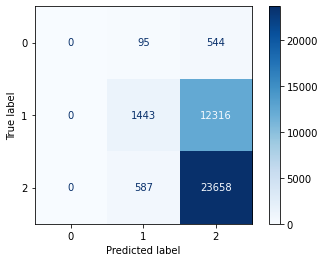

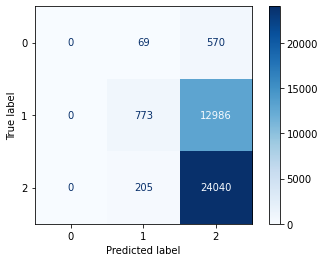

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#Ploteamos la Matriz
plt.figure(dpi = 120,figsize= (15,15))
#Ploteamos la Matriz del modelo optimizado
plot_confusion_matrix(model_RaFo_opt, Xr_test, Yr_test,cmap=plt.cm.Blues)
#Ploteamos la Matriz del modelo sin optimizar
plot_confusion_matrix(model_RaFo, Xr_test, Yr_test,cmap=plt.cm.Blues)
plt.show()

In [ ]:
#evaluamos el error del modelo
from sklearn.metrics import mean_squared_error
def evaluar_modelo(model_RaFo, Xr_train, Xr_test, Yr_train, Yr_test):
       
    Yr_train_pred = model_RaFo.predict(Xr_train)
    Yr_test_pred = model_RaFo.predict(Xr_test)
    Yr_train_pred = scaler_y.inverse_transform(Yr_train_pred)
    Yr_test_pred = scaler_y.inverse_transform(Yr_test_pred)
    Yr_train = scaler_y.inverse_transform(Yr_train)
    Yr_test = scaler_y.inverse_transform(Yr_test)
    Yr_train_pred = Yr_train_pred.reshape((len(Yr_train_pred),1))
    Yr_test_pred = Yr_test_pred.reshape((len(Yr_test_pred),1))

Raíz del error cuadrático medio en Train del algoritmo Random Forest: 0.6263551951315224
Raíz del error cuadrático medio en Test del algoritmo Random Forest: 0.6266349626743851



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


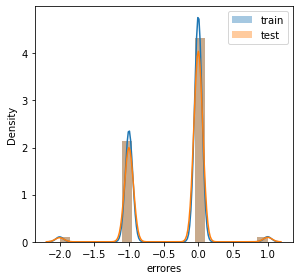

In [ ]:
 #Hacemos el calculo del error
rmse_train_RaFo = np.sqrt(mean_squared_error(Yr_train, Yr_train_pred))
rmse_test_RaFo = np.sqrt(mean_squared_error(Yr_test, Yr_test_pred))
  
print(f'Raíz del error cuadrático medio en Train del algoritmo Random Forest: {rmse_train_RaFo}')
print(f'Raíz del error cuadrático medio en Test del algoritmo Random Forest: {rmse_test_RaFo}\n')
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(Yr_train - Yr_train_pred, bins = 20, label = 'train')
sns.distplot(Yr_test - Yr_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
plt.tight_layout()
plt.show()

## KNN


In [ ]:
#genero el DF para poder validar los datos.
df_wine_KNN = df_wine_100usd
df_wine_KNN.head()

,country,points,price,province,variety,winery,year,continent,categoria_calidad
0,22,87,39,331,688,11588,2013,2,2
1,31,87,15,108,449,12933,2011,2,2
2,40,87,14,268,435,12995,2013,3,2
3,40,87,13,218,477,14365,2013,3,2
4,40,87,65,268,439,14596,2012,3,2


In [ ]:
#Separamos en X e Y, le ponemos la 'k' para referenciar a KNN
Xk = df_wine_KNN.drop(["categoria_calidad", 'points'], axis=1)
Yk = df_wine_KNN[['categoria_calidad']]

In [ ]:
#Importo las librerias para diferenciar train y test
from sklearn.model_selection import train_test_split 
#Defino el porcentaje para cada uno Train: 70, Test:30
Xk_train, Xk_test, Yk_train, Yk_test = train_test_split(Xk, Yk, test_size=0.30, random_state=47) 

In [ ]:
#Importamos el modelo
from sklearn.neighbors import KNeighborsClassifier
#Creamos el modelo
model_KNN = KNeighborsClassifier (n_neighbors= 5, weights = 'uniform', leaf_size= 10)

In [ ]:
#Entrenamos el modelo
model_KNN.fit(Xk_train, Yk_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(leaf_size=10)

In [ ]:
#Prediccion en Train
Yk_train_pred = model_KNN.predict(Xk_train) 
#Prediccion en Test
Yk_test_pred = model_KNN.predict(Xk_test) 

In [ ]:
from sklearn.metrics import accuracy_score
#Se calcula el accuracy en Test
test_accuracy = accuracy_score(Yk_test, Yk_test_pred)
print('% de aciertos en set de entrenamiento:', train_accuracy.round(5))
print('% de aciertos en set de evaluación:',test_accuracy.round(5))

% de aciertos en set de entrenamiento: 0.65017
% de aciertos en set de evaluación: 0.67096


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Yk_test, Yk_test_pred))

              precision    recall  f1-score   support

           0       0.18      0.10      0.13       640
           1       0.55      0.52      0.53     13732
           2       0.74      0.77      0.76     24271

    accuracy                           0.67     38643
   macro avg       0.49      0.46      0.47     38643
weighted avg       0.66      0.67      0.67     38643



In [ ]:
#Generamos algunos valores de hiperparametros
#(también hicimos pocos hiperparámetros por temas de capacidad de procesamiento)
param_grid = {
    'n_neighbors' : [3,5],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']}
print(param_grid)

{'n_neighbors': [3, 5], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [ ]:
# Creoamos el param grid con los hiperparámetros generados previamente
KNN_Grid = GridSearchCV ( 
    KNeighborsClassifier (),
    param_grid,
    verbose = 1,
    cv = 3)

In [ ]:
#importamos el GridSearch
from sklearn.model_selection import GridSearchCV
RaFo_Grid = GridSearchCV(estimator = model_KNN, param_grid = param_grid)

In [ ]:
#Entrenamos el modelo
KNN_Grid.fit (Xk_train, Yk_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
#vemos cuales son los mejores parámetros
KNN_Grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
#corremos el modelo con los parametros optimizados 
model_KNN_opt = KNeighborsClassifier (n_neighbors= 5, weights = 'uniform', metric= 'manhattan', leaf_size= 10)

In [ ]:
model_KNN_opt.fit(Xk_train, Yk_train)
Yk_test_pred = model_KNN_opt.predict(Xk_test) 
from sklearn.metrics import accuracy_score
#Hacemos el accuracy en Test
test_accuracy = accuracy_score(Yk_test, Yk_test_pred)
print('% de aciertos en set de entrenamiento optimizado:', train_accuracy.round(5))
print('% de aciertos en set de evaluación optimizado:',test_accuracy.round(5))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


% de aciertos en set de entrenamiento optimizado: 0.65017
% de aciertos en set de evaluación optimizado: 0.67917


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 600x600 with 0 Axes>

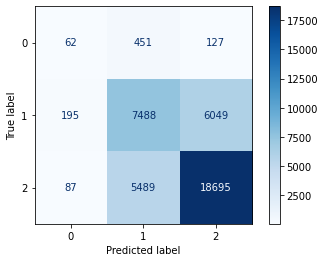

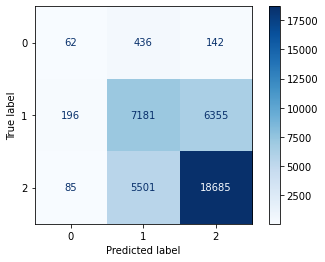

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#print(confusion_matrix(Yk_test, Yk_test_pred))
plt.figure(dpi = 120,figsize= (5,5))
#Ploteamos la Matriz del modelo optimizado
plot_confusion_matrix(model_KNN_opt, Xk_test, Yk_test,cmap=plt.cm.Blues)
#Ploteamos la Matriz del modelo sin optimizar
plot_confusion_matrix(model_KNN, Xk_test, Yk_test,cmap=plt.cm.Blues)
plt.show()

In [ ]:
#evaluamos el error del modelo
def evaluar_modelo(model_KNN, Xk_train, Xk_test, Yk_train, Yk_test):
       
    Yk_train_pred = model_KNN.predict(Xk_train)
    Yk_test_pred = model_KNN.predict(Xk_test)
    Yk_train_pred = scaler_y.inverse_transform(Yk_train_pred)
    Yk_test_pred = scaler_y.inverse_transform(Yk_test_pred)
    Yk_train = scaler_y.inverse_transform(Yk_train)
    Yk_test = scaler_y.inverse_transform(Yk_test)
    Yk_train_pred = Yk_train_pred.reshape((len(Yk_train_pred),1))
    Yk_test_pred = Yk_test_pred.reshape((len(Yk_test_pred),1))

In [ ]:
#Hacemos el calculo del error
rmse_train_knn = np.sqrt(mean_squared_error(Yk_train, Yk_train_pred))
rmse_test_knn = np.sqrt(mean_squared_error(Yk_test, Yk_test_pred))
print(f'Raíz del error cuadrático medio en Train del algoritmo KNN: {rmse_train_knn}')
print(f'Raíz del error cuadrático medio en Test del algoritmo KNN: {rmse_test_knn}\n')  
#no fue posible realizar los gráficos con matplotlib para este algoritmo

Raíz del error cuadrático medio en Train del algoritmo KNN: 0.48410394658857403
Raíz del error cuadrático medio en Test del algoritmo KNN: 0.5809026774857298



In [ ]:
print('PARAMETROS DEL ALGORITMO DECISION TREE')
train_accuracy_DeTree = accuracy_score(Yd_train, Yd_train_pred)
test_accuracy_DeTree = accuracy_score(Yd_test, Yd_test_pred)
print('% de aciertos en set de entrenamiento optimizado:', train_accuracy_DeTree.round(4)*100, '%')
print('% de aciertos en set de evaluación optimizado:',test_accuracy_DeTree.round(4)*100, '%')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_DeTree.round(4)}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_DeTree.round(4)}\n')

print('PARAMETROS DEL ALGORITMO RANDOM FOREST')
train_accuracy_RaFo = accuracy_score(Yr_train, Yr_train_pred)
test_accuracy_RaFo = accuracy_score(Yr_test, Yr_test_pred)
print('% de aciertos en set de entrenamiento optimizado:', train_accuracy_RaFo.round(4)*100, '%')
print('% de aciertos en set de evaluación optimizado:',test_accuracy_RaFo.round(4)*100, '%')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_RaFo.round(4)}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_RaFo.round(4)}\n')

print('PARAMETROS DEL ALGORITMO KNN')
train_accuracy_KNN = accuracy_score(Yk_train, Yk_train_pred)
test_accuracy_KNN = accuracy_score(Yk_test, Yk_test_pred)
print('% de aciertos en set de entrenamiento optimizado:', train_accuracy_KNN.round(4)*100, '%')
print('% de aciertos en set de evaluación optimizado:',test_accuracy_KNN.round(4)*100, '%')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_knn.round(4)}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_knn.round(4)}\n')

PARAMETROS DEL ALGORITMO DECISION TREE
% de aciertos en set de entrenamiento optimizado: 69.89 %
% de aciertos en set de evaluación optimizado: 67.52 %
Raíz del error cuadrático medio en Train: 0.5678
Raíz del error cuadrático medio en Test: 0.5891

PARAMETROS DEL ALGORITMO RANDOM FOREST
% de aciertos en set de entrenamiento optimizado: 65.02 %
% de aciertos en set de evaluación optimizado: 64.96 %
Raíz del error cuadrático medio en Train: 0.6264
Raíz del error cuadrático medio en Test: 0.6266

PARAMETROS DEL ALGORITMO KNN
% de aciertos en set de entrenamiento optimizado: 77.77 %
% de aciertos en set de evaluación optimizado: 67.92 %
Raíz del error cuadrático medio en Train: 0.4841
Raíz del error cuadrático medio en Test: 0.5809

